In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

<h1> Prepare the dataset </h1>

<h2> Read the data files and concatenate </h2>

In [2]:
df1 = pd.read_csv('7282_1.csv')
df2 = pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv')
df3 = pd.read_csv('Datafiniti_Hotel_Reviews.csv')

In [3]:
df = pd.concat([df1, df2, df3])

<h3> We can print out the info of the dataframe, and some sample rows to check </h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55912 entries, 0 to 9999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               55912 non-null  object 
 1   categories            55912 non-null  object 
 2   city                  55912 non-null  object 
 3   country               55912 non-null  object 
 4   latitude              55826 non-null  float64
 5   longitude             55826 non-null  float64
 6   name                  55912 non-null  object 
 7   postalCode            55857 non-null  object 
 8   province              55912 non-null  object 
 9   reviews.date          55653 non-null  object 
 10  reviews.dateAdded     35912 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        55050 non-null  float64
 14  reviews.text          55889 non-null  object 
 15  reviews.title       

In [5]:
df.rename(columns = {
    col : f"{col} ({dtype})"
    for col, dtype in df.dtypes.to_dict().items()
}).sample(5, random_state = 0)

,address (object),categories (object),city (object),country (object),latitude (float64),longitude (float64),name (object),postalCode (object),province (object),reviews.date (object),...,reviews.userProvince (object),id (object),dateAdded (object),dateUpdated (object),primaryCategories (object),keys (object),reviews.dateSeen (object),reviews.sourceURLs (object),sourceURLs (object),websites (object)
12857,1071 E El Camino Real,Hotels,Sunnyvale,US,37.352307,-122.003242,Cherry Orchard Inn,94087,CA,2015-08-23T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31351,35 Via Pico Plz,Hotels,San Clemente,US,33.437538,-117.621732,Holiday Inn Express San Clemente,92672,CA,2016-03-25T00:00:00Z,...,SC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11350,741 E Washington St,"Cocktail Lounges,Restaurants,Hotels,Casinos,Lo...",Charles Town,US,39.293040,-77.850866,Turf Motel,25414,WV,2016-03-12T00:00:00Z,...,VA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2120,100 Colleton Ave SW,"Hotels,Hotel,Restaurants",Aiken,US,33.557110,-81.721620,The Willcox,29801,SC,2016-04-30T00:00:00Z,...,NY,AVwdJcYyIN2L1WUfssF7,2016-05-20T01:56:16Z,2019-05-14T03:07:36Z,Accommodation & Food Services,us/sc/aiken/100colletonavesw/1347872890,2016-05-06T00:00:00Z,https://www.tripadvisor.com/Hotel_Review-g3008...,https://www.yellowpages.com/aiken-sc/mip/the-w...,"http://www.thewillcox.com/restaurant,http://ww..."
12359,7070 Poe Ave,Hotels,Dayton,US,39.849845,-84.189419,Hawthorn Suites Dayton North,45414,OH,2016-06-15T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2> Clean the dataset </h2>

<li> Drop the columns with no observations 
<li> Rename the reviews columns
<li> Drop the rows where review ratings or review texts are not available
<li> Replace the empty titles with an empty string instead of NaN

In [6]:
df.dropna(axis = 'columns', how = 'all', inplace = True)

Check out the reviews columns in more detail

In [7]:
df.loc[:, df.columns.str.startswith("review")].head()

,reviews.date,reviews.dateAdded,reviews.rating,reviews.text,reviews.title,reviews.userCity,reviews.username,reviews.userProvince,reviews.dateSeen,reviews.sourceURLs
0,2013-09-22T00:00:00Z,2016-10-24T00:00:25Z,4.0,Pleasant 10 min walk along the sea front to th...,Good location away from the crouds,NaN,Russ (kent),NaN,NaN,NaN
1,2015-04-03T00:00:00Z,2016-10-24T00:00:25Z,5.0,Really lovely hotel. Stayed on the very top fl...,Great hotel with Jacuzzi bath!,NaN,A Traveler,NaN,NaN,NaN
2,2014-05-13T00:00:00Z,2016-10-24T00:00:25Z,5.0,Ett mycket bra hotell. Det som drog ner betyge...,Lugnt l��ge,NaN,Maud,NaN,NaN,NaN
3,2013-10-27T00:00:00Z,2016-10-24T00:00:25Z,5.0,We stayed here for four nights in October. The...,Good location on the Lido.,NaN,Julie,NaN,NaN,NaN
4,2015-03-05T00:00:00Z,2016-10-24T00:00:25Z,5.0,We stayed here for four nights in October. The...,������ ���������������,NaN,sungchul,NaN,NaN,NaN


In [8]:
old_names = ['reviews.date', 'reviews.rating', 'reviews.title', 'reviews.text', 'reviews.userCity', 
             'reviews.username', 'reviews.userProvince'] 
new_names = ['date', 'rating', 'title', 'text', 'userCity', 'username', 'userProvince']
df.rename(columns = dict(zip(old_names, new_names)), inplace = True)
df

,address,categories,city,country,latitude,longitude,name,postalCode,province,date,...,userProvince,id,dateAdded,dateUpdated,primaryCategories,keys,reviews.dateSeen,reviews.sourceURLs,sourceURLs,websites
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Rockaway Beach,US,45.611260,-123.945560,Silver Sands Oceanfront Motel,97136-9596,OR,2016-03-13T00:00:00Z,...,GA,AVwd4TMv_7pvs4fz-Ers,2016-03-24T11:44:15Z,2018-01-01T00:00:46Z,Accommodation & Food Services,us/or/rockawaybeach/215spacificst/-1035432852,2016-03-23T00:00:00Z,http://www.tripadvisor.com/Hotel_Review-g52043...,https://www.tripadvisor.com/Hotel_Review-g5204...,http://www.oregonsilversands.com
9996,669 Route 6a,"Hotel,Hotels",East Sandwich,US,41.729390,-70.399250,Sandy Neck Motel,02537-1472,MA,2015-12-11T00:00:00Z,...,MA,AVwdRp4DIN2L1WUfuGZZ,2015-10-26T23:03:02Z,2018-01-01T00:00:44Z,Accommodation & Food Services,us/ma/eastsandwich/669route6a/-1480952475,"2016-05-13T00:00:00Z,2016-03-21T00:00:00Z",https://www.tripadvisor.com/Hotel_Review-g4154...,https://www.tripadvisor.com/Hotel_Review-g4154...,http://www.sandyneck.com
9997,702 W Appleway Ave,"Hotel,Hotel, Motel, and Building,Hotels,Lodgin...",Coeur d'Alene,US,47.699930,-116.796900,Shilo Inn Suites - Coeur d'Alene,83814-9338,ID,2017-11-17T00:00:00.000Z,...,UnitedStates,AVwd1TbkByjofQCxs6FH,2016-06-11T03:12:23Z,2018-01-01T00:00:44Z,Accommodation & Food Services,us/id/coeurd'alene/702wapplewayave/210547670,2017-12-17T00:00:00Z,https://www.tripadvisor.com/Hotel_Review-g3541...,https://www.tripadvisor.com/Hotel_Review-g3541...,http://www.shiloinns.com
9998,2295 N Highland Ave,"Hotel,Hotels Motels,Budget Hotels,Hotels & Motels",Jackson,US,35.666390,-88.830120,Scottish Inn,38305-4922,TN,2016-06-09T00:00:00Z,...,NaN,AVwdHbizIN2L1WUfsXto,2016-12-13T03:44:36Z,2018-01-01T00:00:43Z,Accommodation & Food Services,us/tn/jackson/2295nhighlandave/1759289930,2016-07-16T00:00:00Z,https://www.tripadvisor.com/Hotel_Review-g5512...,https://www.tripadvisor.com/Hotel_Review-g5512...,http://api.citygridmedia.com/content/places/v2...


In [9]:
df.dropna(subset = ['rating', 'text'], inplace = True)
df

,address,categories,city,country,latitude,longitude,name,postalCode,province,date,...,userProvince,id,dateAdded,dateUpdated,primaryCategories,keys,reviews.dateSeen,reviews.sourceURLs,sourceURLs,websites
0,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-09-22T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-04-03T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2014-05-13T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2013-10-27T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Riviera San Nicol 11/a,Hotels,Mableton,US,45.421611,12.376187,Hotel Russo Palace,30126,GA,2015-03-05T00:00:00Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,215 S Pacific St,"Hotel,Hotels,Lodging,Motels",Rockaway Beach,US,45.611260,-123.945560,Silver Sands Oceanfront Motel,97136-9596,OR,2016-03-13T00:00:00Z,...,GA,AVwd4TMv_7pvs4fz-Ers,2016-03-24T11:44:15Z,2018-01-01T00:00:46Z,Accommodation & Food Services,us/or/rockawaybeach/215spacificst/-1035432852,2016-03-23T00:00:00Z,http://www.tripadvisor.com/Hotel_Review-g52043...,https://www.tripadvisor.com/Hotel_Review-g5204...,http://www.oregonsilversands.com
9996,669 Route 6a,"Hotel,Hotels",East Sandwich,US,41.729390,-70.399250,Sandy Neck Motel,02537-1472,MA,2015-12-11T00:00:00Z,...,MA,AVwdRp4DIN2L1WUfuGZZ,2015-10-26T23:03:02Z,2018-01-01T00:00:44Z,Accommodation & Food Services,us/ma/eastsandwich/669route6a/-1480952475,"2016-05-13T00:00:00Z,2016-03-21T00:00:00Z",https://www.tripadvisor.com/Hotel_Review-g4154...,https://www.tripadvisor.com/Hotel_Review-g4154...,http://www.sandyneck.com
9997,702 W Appleway Ave,"Hotel,Hotel, Motel, and Building,Hotels,Lodgin...",Coeur d'Alene,US,47.699930,-116.796900,Shilo Inn Suites - Coeur d'Alene,83814-9338,ID,2017-11-17T00:00:00.000Z,...,UnitedStates,AVwd1TbkByjofQCxs6FH,2016-06-11T03:12:23Z,2018-01-01T00:00:44Z,Accommodation & Food Services,us/id/coeurd'alene/702wapplewayave/210547670,2017-12-17T00:00:00Z,https://www.tripadvisor.com/Hotel_Review-g3541...,https://www.tripadvisor.com/Hotel_Review-g3541...,http://www.shiloinns.com
9998,2295 N Highland Ave,"Hotel,Hotels Motels,Budget Hotels,Hotels & Motels",Jackson,US,35.666390,-88.830120,Scottish Inn,38305-4922,TN,2016-06-09T00:00:00Z,...,NaN,AVwdHbizIN2L1WUfsXto,2016-12-13T03:44:36Z,2018-01-01T00:00:43Z,Accommodation & Food Services,us/tn/jackson/2295nhighlandave/1759289930,2016-07-16T00:00:00Z,https://www.tripadvisor.com/Hotel_Review-g5512...,https://www.tripadvisor.com/Hotel_Review-g5512...,http://api.citygridmedia.com/content/places/v2...


In [10]:
df['title'].fillna('', inplace = True)

<h1> Preliminary Exploratory Data Analysis </h1>

<h2> Ratings distribution </h2>

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [12]:
df['rating'].unique()

array([ 4.  ,  5.  ,  3.  ,  1.  ,  2.  ,  0.  ,  4.1 ,  4.9 ,  4.8 ,
        3.4 ,  2.4 ,  3.1 ,  3.2 ,  3.3 ,  9.6 , 10.  ,  8.3 ,  8.8 ,
        9.2 ,  7.5 ,  7.9 ,  7.1 ,  3.8 ,  5.8 ,  6.7 ,  6.3 ,  4.2 ,
        4.5 ,  3.9 ,  1.3 ,  4.3 ,  4.7 ,  2.8 ,  4.4 ,  1.5 ,  4.6 ,
        3.7 ,  5.4 ,  2.5 ,  6.  ,  2.9 ,  7.  ,  9.5 ,  3.55,  4.15,
        3.95,  3.35,  3.75,  2.1 ,  1.65,  3.15,  2.7 ,  1.45,  2.75,
        2.3 ,  3.5 ,  4.25,  1.25,  1.9 ,  3.45,  3.25,  4.75])

In [13]:
df['rating'].describe()

count    55027.000000
mean         3.879251
std          1.335006
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: rating, dtype: float64

<AxesSubplot:>

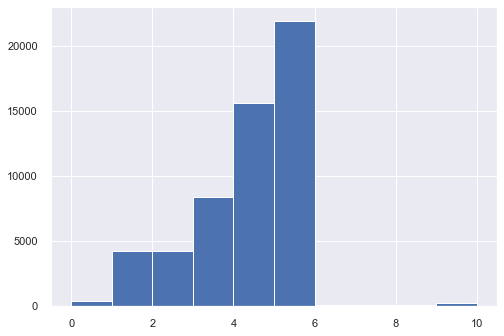

In [14]:
sns.set()
df['rating'].hist()

As we can see, not all ratings are an integers, and ratings range from 0 to 10, even though the majority fall within the range from 1-5

In [15]:
df['rating'].describe()

count    55027.000000
mean         3.879251
std          1.335006
min          0.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         10.000000
Name: rating, dtype: float64

In [16]:
print("Number of ratings greater than 5:", df[df['rating'] > 5].shape[0])
print("Percent of ratings greater than 5:", df[df['rating'] > 5].shape[0] / df.shape[0])

Number of ratings greater than 5: 357
Percent of ratings greater than 5: 0.006487724208116016


There's only 0.6% of ratings greater than 5, and since the scales of these reviews are unclear (e.g., a 10-point review can be 10/10 or 10/100), we exclude them from subsequent analyses.

In [17]:
df = df[df['rating'] <= 5]

We also note that the minimum rating in the dataset is 0. The histogram plotted above indicates that the number of reviews with a rating of 0 is small relative to all other ratings. To assure that this the case, we compute the following:

In [18]:
print("Number of ratings equal to 0:", df[df['rating'] == 0].shape[0])
print("Percent of ratings equal to 0:", df[df['rating'] == 0].shape[0] / df.shape[0])

Number of ratings equal to 0: 337
Percent of ratings equal to 0: 0.006164258276934334


We see that only 0.6% of the dataset correspond to reviews with a rating of 0. While we have not formally tested for outliers in this dataset, observations with a 0 rating could be considered outliers due to their rare occurrence in the dataset. Moreover, many ratings constrain their minimum rating to 1, so it will not be possible to attain a 0 for some hotels which may impact the performance of our model. Therefore, we will remove all observations with a 0 rating from the dataset. 

In [19]:
# df = df[df.rating != 0]

In [20]:
# df['rating'].describe()

We note that now all reviews are between 1 and 5 (inclusive).

<h2> Average Ratings by Hotels </h2>

We first group the dataframe by hotels and then compute the average ratings for each hotel.

In [21]:
hotel_grouped = df.groupby('name')
avg_rating = pd.DataFrame(hotel_grouped.mean()['rating'])
avg_rating

,rating
name,
11th Avenue Hotel Hostel,1.000000
1785 Inn,2.625000
1900 House,4.571429
1906 Lodge At Coronado Beach,5.000000
21c Museum Hotel Lexington,2.500000
...,...
Ye Olde Danish Inn,5.000000
Z Bar Motel,4.000000
dana hotel and spa,4.482609


We can look into the average rating distribution

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

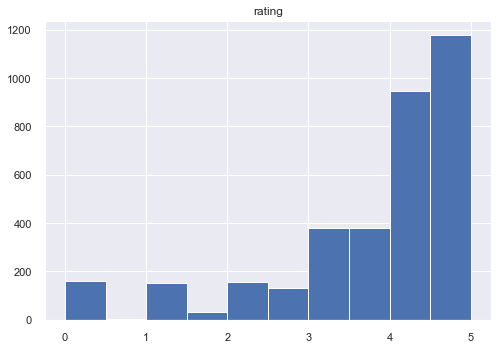

In [22]:
avg_rating.hist()

We want to sort the dataframe by average rating, so that we can show the five hotels with highest ratings and five hotels with lowest ratings

In [23]:
avg_rating.sort_values(by = 'rating').head()

,rating
name,
Busy B Ranch,0.0
Hampton Inn & Suites Douglas,0.0
Carleton Hotel,0.0
Cascabel,0.0
Days Inn Suites,0.0


In [24]:
avg_rating.sort_values(by = 'rating', ascending = False).head()

,rating
name,
Holiday Inn Express & Suites Helena,5.0
Comfort Suites-redmond Airport,5.0
Comfort Inn Red Hook,5.0
Comfort Inn South,5.0
Inn At Nye Beach,5.0


We see that the five hotels with lowest ratings all have ratings of 0.0 and the five hotels with highest ratings all have ratings of 5.0. However, an average rating might be biased for hotels with only 1 rating. Thus, we look into the number of ratings for all hotels

In [25]:
avg_rating['num_rating'] = hotel_grouped.size()

In [26]:
avg_rating.sort_values(by = 'rating').head()

,rating,num_rating
name,,
Busy B Ranch,0.0,1
Hampton Inn & Suites Douglas,0.0,1
Carleton Hotel,0.0,1
Cascabel,0.0,1
Days Inn Suites,0.0,1


In [27]:
avg_rating.sort_values(by = 'rating', ascending = False).head()

,rating,num_rating
name,,
Holiday Inn Express & Suites Helena,5.0,1
Comfort Suites-redmond Airport,5.0,1
Comfort Inn Red Hook,5.0,1
Comfort Inn South,5.0,1
Inn At Nye Beach,5.0,1


Indeed, we see that all these hotels with "lowest" and "highest" ratings only have 1 rating. We investigate this further

In [28]:
print("Number of hotels with exactly 1 rating:", avg_rating[avg_rating['num_rating'] == 1].shape[0])
print("Number of hotels with more than 1 rating:", avg_rating[avg_rating['num_rating'] > 1].shape[0])
print("Number of hotels with more than 2 ratings:", avg_rating[avg_rating['num_rating'] > 2].shape[0])

Number of hotels with exactly 1 rating: 1212
Number of hotels with more than 1 rating: 2305
Number of hotels with more than 2 ratings: 1768


In fact, only 2,306 hotels out of 3,518 hotels have more than 1 rating and only 1,769 hotels have more than 2 ratings. If we were to only consider hotels with at least 5 ratings, the top and bottom hotels are as followed:

In [29]:
avg_rating[avg_rating['num_rating'] > 5].sort_values(by = 'rating').head()

,rating,num_rating
name,,
The Litchfield Inn,0.000000,13
Norwood Inn and Suites,1.446154,65
Fiesta Inn and Suites,1.454212,546
Seattle Pacific Hotel,1.461538,13
Uptown Motel,1.571429,7


In [30]:
avg_rating[avg_rating['num_rating'] > 5].sort_values(by = 'rating', ascending = False).head()

,rating,num_rating
name,,
Inn At The 5th,5.0,6
Home2 Suites by Hilton Tallahassee State Capitol,5.0,10
Esmeralda Inn,5.0,8
Home2 Suites By Hilton Greenville Airport,5.0,6
Embassy Suites By Hilton Houston Downtown,5.0,10


<h2> Hotel Categories </h2>

We start by counting the frequency of hotels categories

In [31]:
hotel_categories = df['categories'].str.split(",").explode()
hotel_categories.value_counts()

Hotels                       46462
Hotel                        26796
Lodging                      11090
Hotels Motels                 8257
Hotels and motels             6846
                             ...  
Holding companies                1
Medical Spa                      1
 NY                              1
Hotel Downtown Greenville        1
Physicians-md and do             1
Name: categories, Length: 572, dtype: int64

However, we see that some categories clearly overlap (e.g., Hotels and hotel). Thus, we perform some text cleaning to collapse them. In particular, we lowercase and tokenize the category, remove stopwords, and convert each token to its base form via lemmatization. In addition, to remove special symbols such as &, we only consider categories that have at least two characters

In [32]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer 

nltk.download("stopwords", quiet = True)
lemmatizer = WordNetLemmatizer()
english_stopwords = set(nltk.corpus.stopwords.words('english'))

def clean_category(text):
    return [
        lemmatizer.lemmatize(token)
        for token in nltk.word_tokenize(text.lower())
        if token not in english_stopwords and len(token) > 1
    ]

hotel_categories = hotel_categories.apply(clean_category).explode()

<AxesSubplot:>

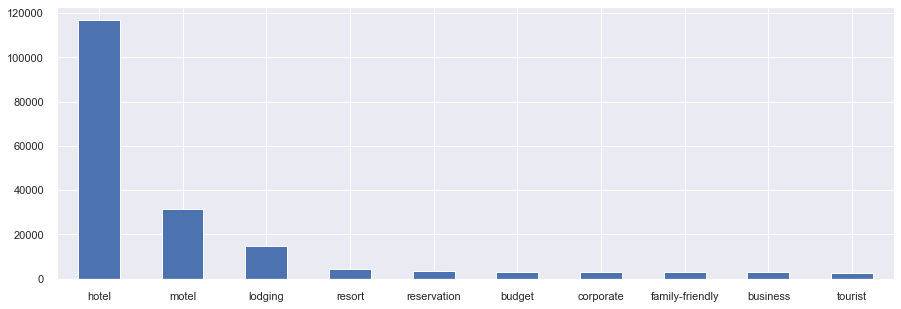

In [33]:
hotel_categories.value_counts().nlargest(10).plot(kind = "bar", rot = 0, figsize = (15, 5))

In [34]:
hotel_categories.value_counts().nlargest(10)

hotel              116893
motel               31334
lodging             14684
resort               4338
reservation          3280
budget               3193
corporate            3187
family-friendly      3151
business             3024
tourist              2664
Name: categories, dtype: int64

Showing the 10 most common hotel categories, we see that after hotel, motel and lodging on one hand and resort on another hand are also quite popular

<h2> Review dates </h2>

Presumably people would write their review to a hotel shortly after their stay, so looking at the review count at a particular time would provide some insights into a hotel's traffic at that time.

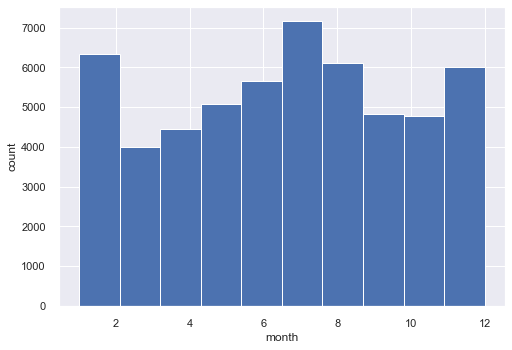

In [35]:
df['month'] = pd.to_datetime(df['date']).dt.month
ax = df['month'].hist()
ax.set_xlabel('month')
ax.set_ylabel('count');

We see that the three clear modes are in January, July, and December. These three months correspond to the New Year holiday, summer holiday, and Christmas, so it makes sense that they yielded the highest number of guests and reviews.

<h2> Distribution of ratings by month </h2>

Could we try to see if the ratings tend to be higher at certain times of the year than at other times?

In [36]:
month_rating_grouped = df.groupby(['month', 'rating'])
month_rating_grouped.size().unstack()

rating,0.00,1.00,1.25,1.30,1.45,1.50,1.65,1.90,2.00,2.10,...,4.25,4.30,4.40,4.50,4.60,4.70,4.75,4.80,4.90,5.00
month,,,,,,,,,,,,,,,,,,,,,
1.0,9.0,167.0,NaN,NaN,NaN,NaN,1.0,NaN,205.0,NaN,...,1.0,16.0,8.0,5.0,10.0,NaN,NaN,17.0,1.0,1372.0
2.0,7.0,213.0,NaN,NaN,1.0,NaN,NaN,NaN,197.0,1.0,...,NaN,3.0,10.0,NaN,9.0,NaN,NaN,13.0,NaN,1371.0
3.0,10.0,310.0,1.0,NaN,NaN,NaN,1.0,NaN,248.0,3.0,...,NaN,1.0,9.0,4.0,20.0,NaN,NaN,21.0,NaN,1692.0
4.0,4.0,330.0,NaN,1.0,1.0,NaN,2.0,NaN,332.0,NaN,...,NaN,NaN,10.0,NaN,10.0,NaN,NaN,15.0,2.0,1863.0
5.0,7.0,361.0,NaN,NaN,2.0,NaN,1.0,NaN,346.0,3.0,...,NaN,NaN,12.0,NaN,19.0,NaN,NaN,12.0,2.0,2034.0
6.0,13.0,499.0,NaN,NaN,2.0,1.0,NaN,NaN,439.0,NaN,...,NaN,NaN,11.0,1.0,12.0,1.0,NaN,23.0,NaN,2184.0
7.0,18.0,649.0,NaN,NaN,NaN,NaN,NaN,2.0,608.0,1.0,...,NaN,NaN,13.0,1.0,18.0,1.0,NaN,16.0,NaN,2655.0
8.0,22.0,512.0,NaN,NaN,NaN,NaN,NaN,1.0,513.0,1.0,...,1.0,NaN,8.0,NaN,26.0,1.0,1.0,23.0,1.0,2274.0
9.0,10.0,391.0,NaN,NaN,NaN,NaN,1.0,NaN,396.0,NaN,...,NaN,NaN,5.0,1.0,11.0,NaN,NaN,14.0,NaN,1934.0


It is a bit hard to see the distribution this way, so we can classify the ratings into groups

In [37]:
rating_categories = ["Very bad", "Moderately bad", "Somewhat bad", "Somewhat good", "Moderately good", "Very good"]
df['rating_category'] = df['rating'].apply(lambda r: rating_categories[int(r)])

In [38]:
month_rating_cat_grouped = df.groupby(['month', 'rating_category'])
month_rating_df = month_rating_cat_grouped.size().unstack()[rating_categories]
month_rating_df

rating_category,Very bad,Moderately bad,Somewhat bad,Somewhat good,Moderately good,Very good
month,,,,,,
1.0,9,168,213,456,950,1372
2.0,7,214,204,461,919,1371
3.0,10,312,259,566,1157,1692
4.0,4,334,343,612,1299,1863
5.0,7,364,357,811,1492,2034
6.0,13,502,446,881,1635,2184
7.0,18,651,624,1205,2010,2655
8.0,22,513,522,991,1783,2274
9.0,10,392,409,744,1344,1934


<AxesSubplot:xlabel='month'>

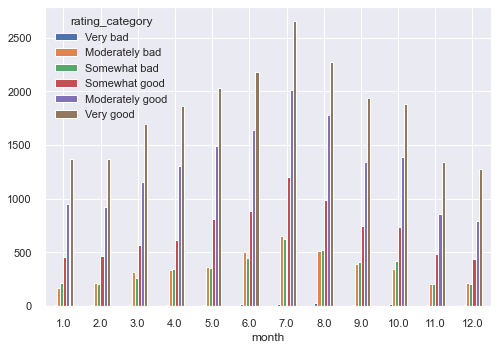

In [39]:
month_rating_df.plot(kind = 'bar', rot = 0)   
# Make this larger and plot a time series graph for each category/rating.

As we expected from the rating distribution earlier, most reviews are relatively position. Additionally, we can see that even though January, July, and December have the most reviews, July is the month with the most positive reviews. Perhaps this means in the summer, people tend to leave better reviews than other seasons.

<h2> Reviews Wordclouds</h2>

<h3> Considering all reviews </h3>

We can populate the word clouds for all reviews to see what reviewers care about the most

In [40]:
df['review'] = df['title'] + ' ' + df['text']
df['review']

0       Good location away from the crouds Pleasant 10...
1       Great hotel with Jacuzzi bath! Really lovely h...
2       Lugnt l��ge Ett mycket bra hotell. Det som dro...
3       Good location on the Lido. We stayed here for ...
4       ������ ��������������� We stayed here for four...
                              ...                        
9995    Picture Window Ocean View! It is hard for me t...
9996    Clean, comfortable and quiet I live close by, ...
9997    Passing through Rolled in 11:30 laid out heads...
9998    Terrible Absolutely terrible..I was told I was...
9999    Polde Filthy, outdated, noisy neighbours, but ...
Name: review, Length: 54670, dtype: object

In [41]:
text=''
for rev in df['review']:
    text += rev

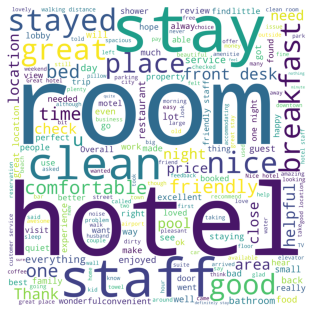

In [42]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',width = 3000,height = 3000).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We see that the most common words are actually "hotel", "room", and "stay", which makes sense, but does not give us much insight. That is, words such as these may not provide value in prediction as they appear so frequently. Thus, we remove these three words and build the word cloud again. Additionally, we want to exclude "I" and "s" which appear frequently in reviews.

In [43]:
def remove_words(text_string, DELETE_WORDS = []):
    text_string = text_string.lower()
    for word in DELETE_WORDS:
        if len(word) == 1: 
            text_string = text_string.replace(' ' + word + ' ',' ')
        else:
            text_string = text_string.replace(word,' ')
    return text_string

def clean_text(all_reviews):
    text = ''
    for rev in all_reviews:
        text += rev
    text = remove_words(text, ['hotel', 'room', 'stay', 'I', 's'])
    return text

In [44]:
#Remove short words
def remove_short_words(text_string, min_length = 0):
    word_list = text_string.split()
    for word in word_list:
        if len(word) < min_length:
            text_string = text_string.replace(' ' + word + ' ',' ')
    return text_string

Getting rid of end of line characters

In [53]:
text = clean_text(df['review'])
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')

In [55]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from collections import OrderedDict
import pprint

In [56]:
words = word_tokenize(striptext)
lowercase_words = [word.lower() for word in words
                  if word not in stopwords.words() and word.isalpha()]

Construct word frequencies and list the most commonly used words in reviews

In [57]:
word_frequencies = FreqDist(lowercase_words)
most_frequent_words = FreqDist(lowercase_words).most_common(20)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(most_frequent_words)

[   ('great', 21653),
    ('staff', 21502),
    ('clean', 18189),
    ('nice', 16135),
    ('good', 15679),
    ('breakfast', 15225),
    ('location', 12992),
    ('would', 12417),
    ('us', 10869),
    ('place', 10865),
    ('friendly', 10817),
    ('comfortable', 9306),
    ('night', 8814),
    ('time', 8795),
    ('service', 8376),
    ('bed', 7669),
    ('area', 7295),
    ('desk', 7066),
    ('get', 6684),
    ('front', 6662)]


After excluding words like 'hotel', 'room', 'stay', we observe that 'great', 'staff', 'clean' are some of the most frequently used words in reviews, indicating that most reviews are more positive than they are negative. 

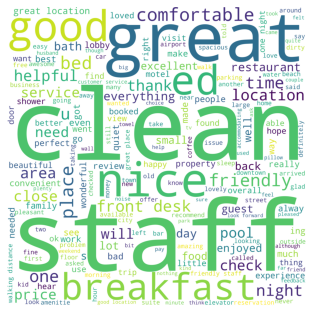

In [58]:
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',width = 3000,height = 3000).generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

From this we see that many reviews mention "clean" and "staff", suggesting that cleanliness and the behavior of hotel staff are something that matter to customers and may influence their rating of the hotel.

We also see some mentions of "breakfast", "location", "front desk", etc. These are also some features that customer pay attention to.

<h3> Considering good reviews and bad reviews </h3>

Would the word clouds be any different for the very good reviews (rating 5.0) and the very bad reviews (rating 0.0)?

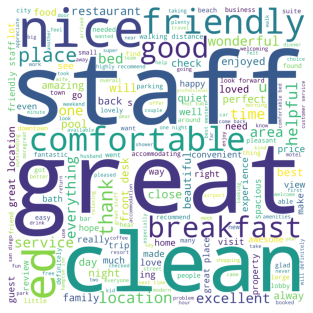

In [46]:
good_reviews = df[df['rating'] == 5.0]['review']

good_text = clean_text(good_reviews)
    
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',width = 3000,height = 3000).generate(good_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

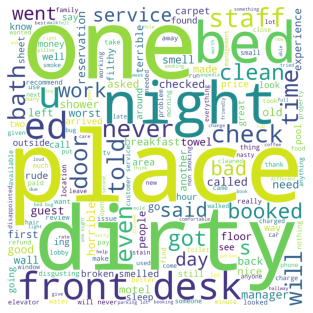

In [47]:
bad_reviews = df[df['rating'] == 1.0]['review']

bad_text = clean_text(bad_reviews)
    
wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',width = 3000,height = 3000).generate(bad_text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

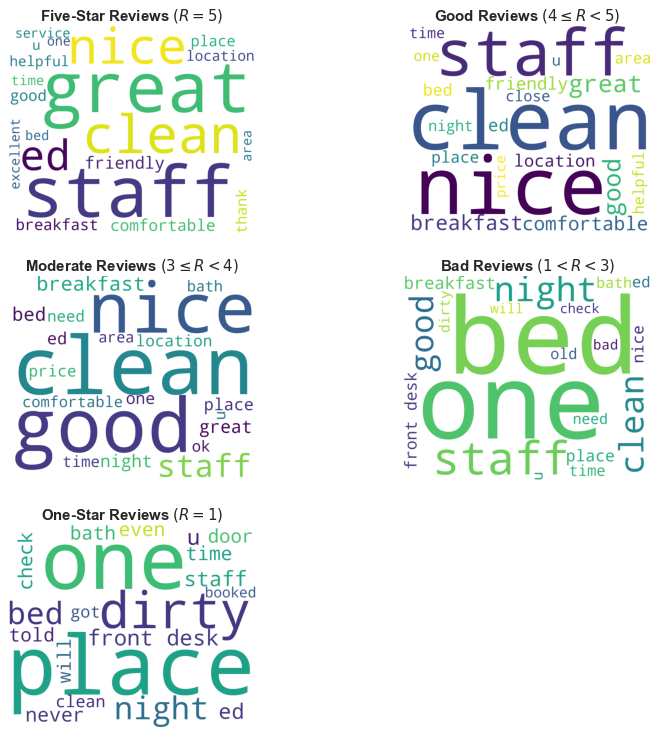

In [76]:
five_star_reviews = df[df['rating'] == 5.0]['review']
good_reviews = df[(df.rating >=4.0) & (df['rating'] < 5.0)]['review']
moderate_reviews = df[(df.rating >=3.0) & (df['rating'] < 4.0)]['review']
bad_reviews = df[(df.rating > 1.0) & (df['rating'] < 3.0)]['review']
one_star_reviews = df[df['rating'] == 1.0]['review']

five_star_text = clean_text(five_star_reviews)
good_text = clean_text(good_reviews)
moderate_text = clean_text(moderate_reviews)
bad_text = clean_text(bad_reviews)
one_star_text = clean_text(one_star_reviews)


all_reviews = [('Five-Star Reviews $(R = 5)$', five_star_text), 
               ('Good Reviews $(4 \leq R < 5)$', good_text), 
               ('Moderate Reviews $(3 \leq R < 4)$',moderate_text),
               ('Bad Reviews $(1< R < 3)$', bad_text),
              ('One-Star Reviews $(R = 1)$',one_star_text)]

COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(13,13))
fig.delaxes(axes[2,1]) # deletes the 6th plot instance (since we are computing an odd number of plots)

for i in range(0,len(all_reviews)):
#     hotel_reviews = df[df['name'] == hotel_name]['review']
    hotel_reviews = clean_text(all_reviews[i][1])
    ax = axes[i//2, i%2] 
    ax.set_title(all_reviews[i][0], fontsize=15, fontweight='bold')
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',width=1200,height=1000,max_words=20).generate(hotel_reviews)
    ax.imshow(wordcloud)
    ax.axis('off')

Based on the word cloud plots, it appears that for reviews with ratings above 3 many of the most frequently used words are similar (e.g., clean, good, and staff). On the other hand, for reviews with ratings below 3 stars do not to appear to have many frequently used words in common, besides 'one'. In fact, many reviews with ratings between 1 and 3 appear to include words that would otherwise be positive such as 'clean', 'good', and 'nice'. However, the contextual use around these words would need to be evaluated further to make any meaningful conclusions about this.

We can see that the good reviews mention a lot of "clean" and "staff", other than the obvious "great". There are also a lot of mentions of "friendly", "helpful", "comfortable", "convenient", "location", which all hint that the good hotels are the one that are clean and comfortable, with friendly and helpful staff, and at a convenient location.

On the other hand, the bad reviews are the one about hotels that are "dirty", "booked", or even "smelled".

We can verify these by looking at specific reviews for top hotels and bottom hotels.

<h3> Considering reviews for top hotels and bottom hotels </h3>

To ensure we have enough reviews to generate wordclouds, we consider the 4 best and worst hotels where each hotel has at least 5 reviews

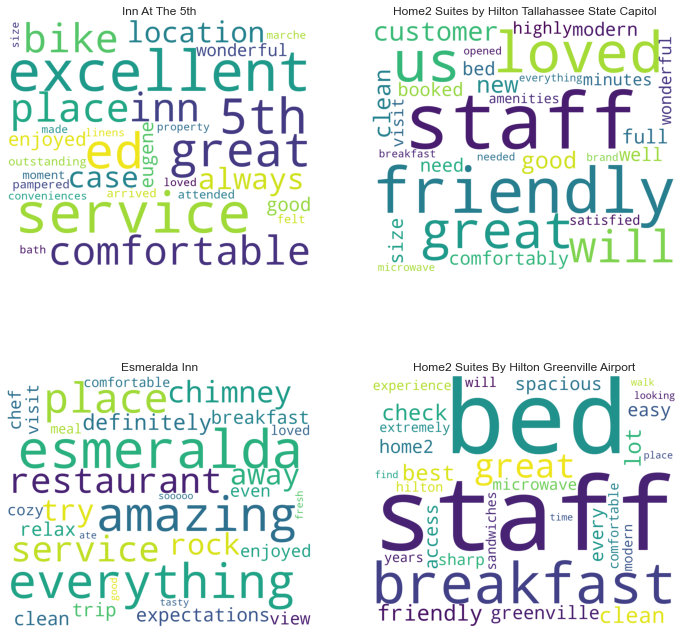

In [77]:
top_hotels_avg_rating = avg_rating[avg_rating['num_rating'] > 5].sort_values(by = 'rating', ascending = False).head(4)
top_hotels_avg_rating.reset_index(level=0, inplace=True)
#top_hotels = df[df['name'].isin(top_hotels_avg_rating['name'])]

top_hotels = []

for hotel_name in top_hotels_avg_rating['name']:
    hotel_reviews = df[df['name'] == hotel_name]['review']
    hotel_text = clean_text(hotel_reviews)
    
    top_hotels.append((hotel_name, hotel_text))
    
#Set up side by side clouds
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,len(top_hotels)):
    text_string = top_hotels[i][1]
    
    ax = axes[i//2, i%2] 
    ax.set_title(top_hotels[i][0])
    wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white',width=1200,height=1000,max_words=30).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
    
plt.show()

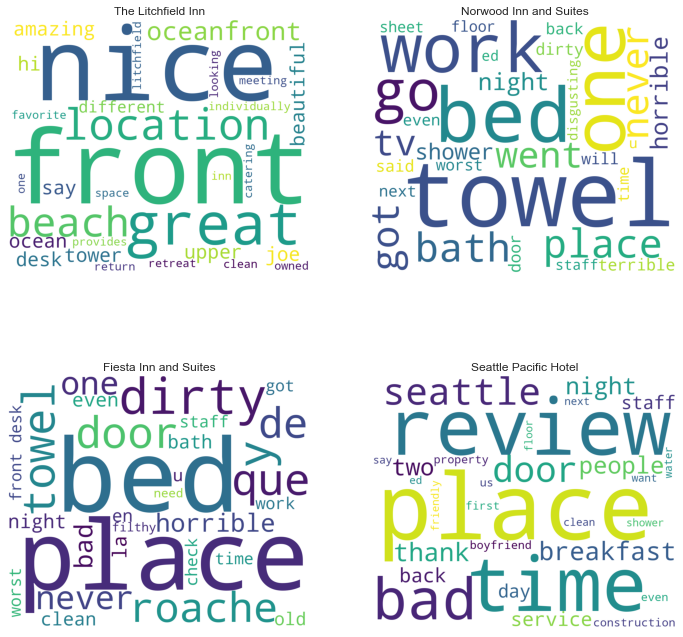

In [78]:
bottom_hotels_avg_rating = avg_rating[avg_rating['num_rating'] > 5].sort_values(by = 'rating').head(4)
bottom_hotels_avg_rating.reset_index(level=0, inplace=True)
#bottom_hotels = df[df['name'].isin(bottom_hotels_avg_rating['name'])]

bottom_hotels = []

for hotel_name in bottom_hotels_avg_rating['name']:
    hotel_reviews = df[df['name'] == hotel_name]['review']
    hotel_text = clean_text(hotel_reviews)
    
    bottom_hotels.append((hotel_name, hotel_text))
    
#Set up side by side clouds
COL_NUM = 2
ROW_NUM = 2
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))

for i in range(0,len(bottom_hotels)):
    text_string = bottom_hotels[i][1]
    
    ax = axes[i//2, i%2] 
    ax.set_title(bottom_hotels[i][0])
    wordcloud = WordCloud(stopwords = STOPWORDS,background_color='white',width=1200,height=1000,max_words=30).generate(text_string)
    ax.imshow(wordcloud)
    ax.axis('off')
    
plt.show()

In [79]:
# from sklearn.feature_extraction.text import CountVectorizer

# cv = CountVectorizer(stop_words='english')
# data_cv = cv.fit_transform(text)
# data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())

<h1> Predicting reviews rating from reviews text and title </h1>

<h2> Features Engineering using TD-IDF and Prepare training and testing datasets </h2>

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.3, random_state = 28)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train['review'])
#X_train.A

In [ ]:
y_train = train['rating']
#y_train

In [ ]:
X_test = vectorizer.transform(test['review'])
y_test = test['rating']
#X_test.A

<h2> Model Development </h2>

<li> Train various regression models
<li> Transform non-integer ratings to integers
<li> Train multiclassification models using integer ratings
<li> Group ratings into two categories, 'Good' and 'Bad', which will be denoted by a 1 and 0, respectively.
<li> Train binary classification models on binary-{0,1} dependent variable

Notice above in our EDA that many user ratings are not integers. Based on this, we will initially train a set of regression models and evaluate their performance and then train multi- and binary classifiers after transforming the ratings variable.

In [ ]:
def fit_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
    
    model_r2 = r2_score(y_test, y_pred)
    model_mse = mean_squared_error(y_test, y_pred)
    model_evs = explained_variance_score(y_test, y_pred)
    
    return model_r2, model_mse, model_evs

<h3> Using Linear Regression </h3>

In [ ]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression() # an empty model

In [ ]:
lin_r2, lin_mse, lin_evs = fit_model(lin_reg)

<h3> Using Decision Tree </h3>

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dct_reg = DecisionTreeRegressor(max_depth = 5)

In [ ]:
dct_r2, dct_mse, dct_evs = fit_model(dct_reg)

<h3> Using Random Forest </h3>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth = 5, random_state = 0)

In [ ]:
rf_r2, rf_mse, rf_evs = fit_model(rf_reg)

<h3> Using Nearest Neighbors </h3>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors = 2)

In [ ]:
knn_r2, knn_mse, knn_evs = fit_model(knn_reg)

<h3> Using Multi-layer Perceptron </h3>

In [ ]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(random_state = 1, max_iter = 500)

In [ ]:
mlp_r2, mlp_mse, mlp_evs = fit_model(mlp_reg)

<h3> Using Support Vector Machines </h3>

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR()

In [ ]:
svm_r2, svm_mse, svm_evs = fit_model(svm_reg)

<h4> Compare Model Performance of Regresion models</h4>

In [ ]:
all_models = [lin_reg, dct_reg, rf_reg, knn_reg, mlp_reg, svm_reg]
data = []

for model in all_models:
    model_r2, model_mse, model_evs = fit_model(model)
    data.append({'R-quared' : model_r2, 'Mean squared error' : model_mse, 'Explained variance score': model_evs})
    
performance = pd.DataFrame(data)
performance

<h2> Multiclass classification model development </h2>

In [80]:
df2 = df
df2.rating = df2.rating.astype(int)

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
train2, test2 = train_test_split(df2, test_size = 0.3, random_state = 123)

tfidf_1gram_vec = TfidfVectorizer(min_df=20, ngram_range=(1,1), stop_words='english')
x_train2 = tfidf_1gram_vec.fit_transform(train2['review'])
y_train2 = train2['rating']
feature_names = tfidf_1gram_vec.get_feature_names()

x_test2 = vectorizer.fit_transform(test2['review'])
y_test2 = test2['rating']
feature_names

['00',
 '000',
 '00am',
 '00pm',
 '10',
 '100',
 '101',
 '10am',
 '10pm',
 '10th',
 '11',
 '11am',
 '11pm',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '16th',
 '17',
 '18',
 '19',
 '1am',
 '1st',
 '20',
 '200',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '20th',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250',
 '25th',
 '26',
 '27',
 '275',
 '28',
 '29',
 '2am',
 '2nd',
 '2pm',
 '30',
 '300',
 '304',
 '30am',
 '30pm',
 '35',
 '39',
 '393',
 '3am',
 '3pm',
 '3rd',
 '40',
 '400',
 '4000',
 '45',
 '4pm',
 '4th',
 '50',
 '500',
 '504',
 '55',
 '5700',
 '5am',
 '5pm',
 '5th',
 '60',
 '619',
 '65',
 '66',
 '6am',
 '6pm',
 '6th',
 '70',
 '72',
 '75',
 '7am',
 '7pm',
 '7th',
 '80',
 '800',
 '81',
 '85',
 '8am',
 '8pm',
 '8th',
 '90',
 '95',
 '99',
 '9am',
 '9pm',
 '9th',
 'aaa',
 'abbey',
 'aber',
 'abilene',
 'ability',
 'able',
 'abri',
 'absolute',
 'absolutely',
 'abundance',
 'ac',
 'accept',
 'acceptable',
 'access',
 'accessible',
 'accident',
 'accidentally',
 'accommodate',
 'ac

In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters = {
     'n_estimators':(10, 30, 50), # the number of trees
     'max_depth':(4,5,6,8,10,15), # the maximum depth of each decision tree (you don't want it to be too deep since then nodes would have fewer observations)
     'min_samples_split': (2, 4, 8), # at each intermediate node (non-leaf node), the minimum number of examples/observations in that node. If the number of datapoints is fewer than this h-param, then it won't do the split.
     'min_samples_leaf': (4,8,12,16) # the minimum sample size (# of obs) at each leaf node
}

# model = GridSearchCV(RandomForestClassifier(),parameters,cv=3,iid=False)
model = GridSearchCV(RandomForestClassifier(),parameters,cv=3)
model.fit(x_train2, np.ravel(y_train2))
model.best_score_, model.best_params_   # prints the best score achieved and the best hyperparameters

(0.4230839007073024,
 {'max_depth': 15,
  'min_samples_leaf': 12,
  'min_samples_split': 8,
  'n_estimators': 10})

In [172]:
model = RandomForestClassifier(max_depth=15,min_samples_leaf=12,
                               min_samples_split=8,n_estimators=10)
model.fit(x_train2,np.ravel(y_train2))

RandomForestClassifier(max_depth=15, min_samples_leaf=12, min_samples_split=8,
                       n_estimators=10)

Text(0.5, 0, 'Relative Importance')

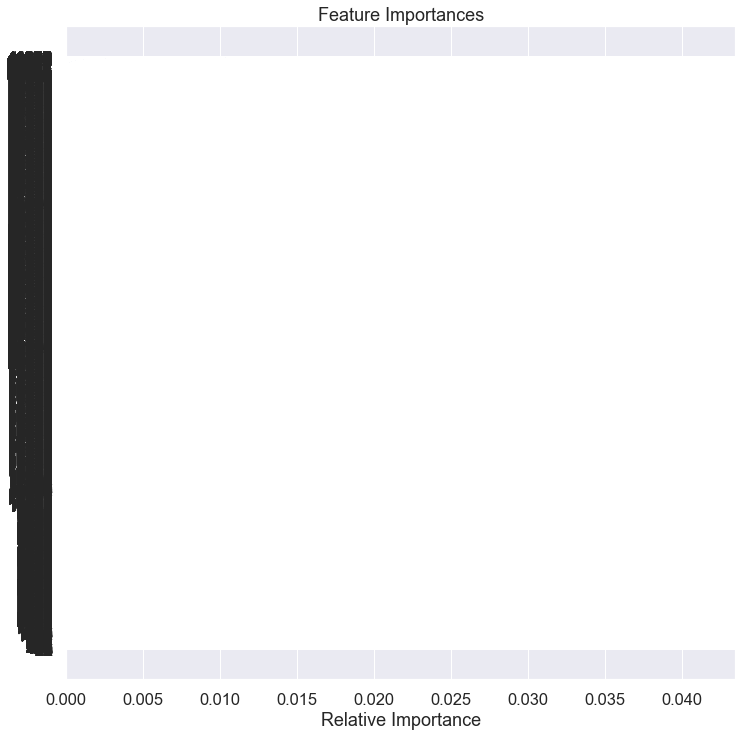

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model.feature_importances_   # returns an array of importance values
indices = np.argsort(importances)      # the argsort function returns the array of indices of the sorted array (in increasing or decreasing order)
plt.figure(figsize=(12,12))            
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)))
plt.xlabel('Relative Importance')

In [194]:
sorted(importances, reverse=True)[:30]

[0.04142340956806766,
 0.03850293765709802,
 0.021910893963074954,
 0.019545873433552057,
 0.016906865046542555,
 0.016653835633258486,
 0.01612383199045922,
 0.01576477660089641,
 0.01535769251489173,
 0.014955507122354543,
 0.01474208832196567,
 0.014616932246802349,
 0.014177268043446972,
 0.013633417665013402,
 0.01319282985086379,
 0.013103751519651265,
 0.013004474937154785,
 0.012663898961486784,
 0.01254035896519006,
 0.012382161309947742,
 0.01168774662992147,
 0.011664309943609914,
 0.011304931642503459,
 0.01111842771390443,
 0.01046380558392635,
 0.010320551445778378,
 0.010152503273959633,
 0.009693089846231037,
 0.00891711248599595,
 0.008734682381281242]

In [175]:
model.score(x_test2,y_test2)

ValueError: X has 20709 features, but DecisionTreeClassifier is expecting 41312 features as input.

<h3> Segmentation Analysis </h3>

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

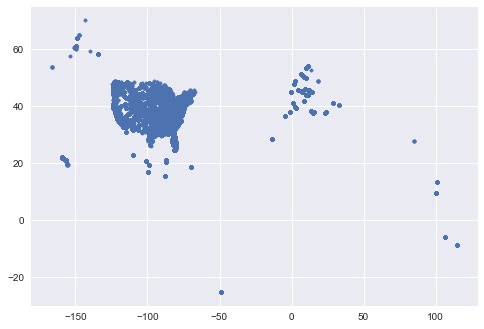

In [96]:
plt.scatter(x = df.longitude, y=df.latitude, marker='.')

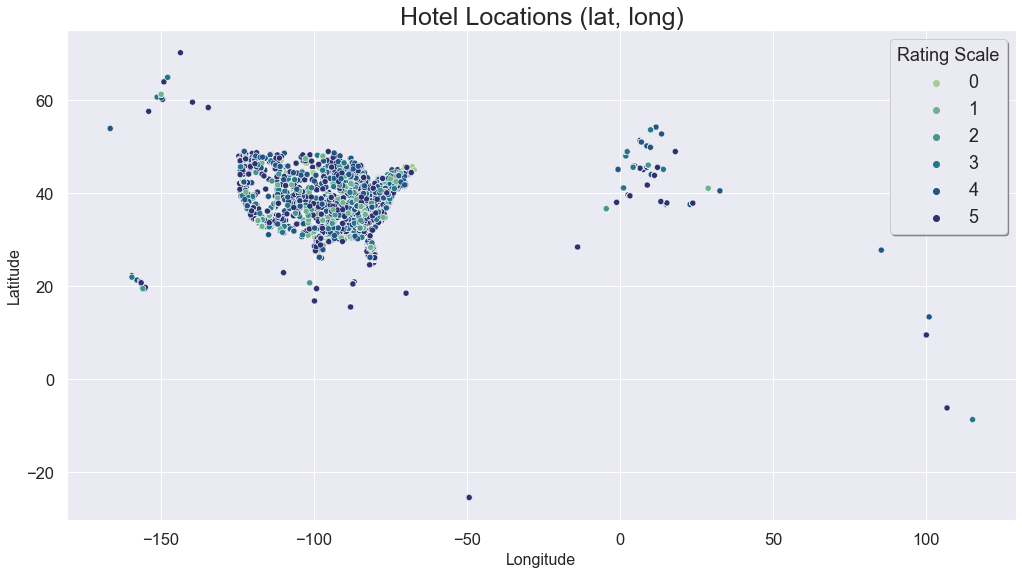

In [153]:
sns.set(rc={"figure.figsize":(17, 9)}, font_scale=1.5) 
p=sns.scatterplot(data=df, x='longitude', y='latitude', hue='rating',
                markers='.', legend='full',palette='crest')

p.set_title('Hotel Locations (lat, long)', fontsize = 25)
p.set_xlabel("Longitude", fontsize = 16)
p.set_ylabel("Latitude", fontsize = 16)
plt.legend(fontsize='medium', title='Rating Scale', shadow='True', frameon='True')

Most of the reviews appear to be in the U.S.. We also see that the ratings appear to be evenly distributed with respect to location.

Filtering out all locations outside of the U.S.

In [154]:
df3 = df[((df['latitude']<=50.0) & (df['latitude']>=24.0)) & 
         ((df['longitude']<=-65.0) & (df['longitude']>=-122.0))]

Plot another scatter plot, but on the truncated dataset (constrained to only those hotel reviews within the U.S.).

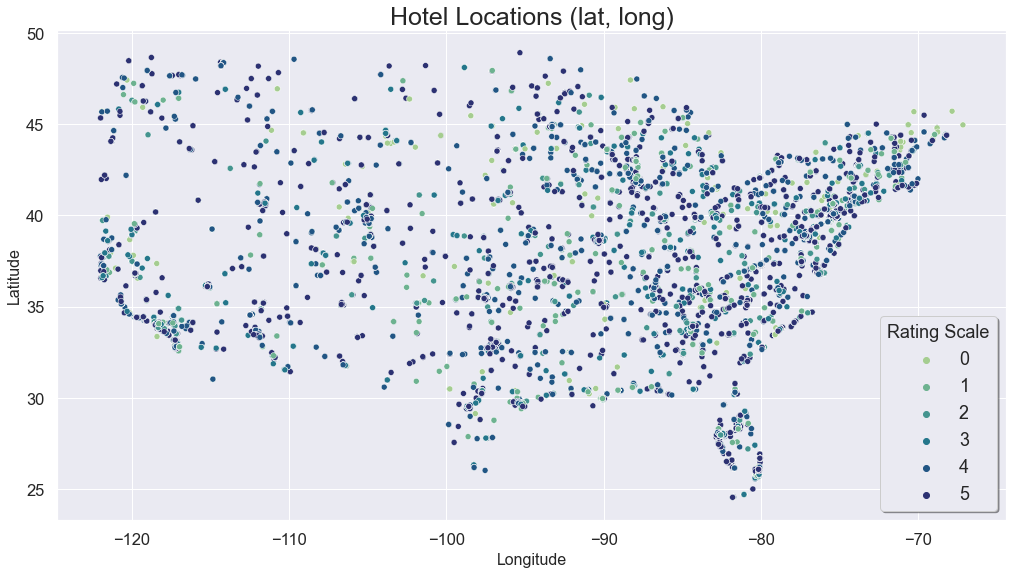

In [155]:
sns.set(rc={"figure.figsize":(17, 9)}, font_scale=1.5) 
p=sns.scatterplot(data=df3, x='longitude', y='latitude', hue='rating',
                markers='.', legend='full',palette='crest')

p.set_title('Hotel Locations (lat, long)', fontsize = 25)
p.set_xlabel("Longitude", fontsize = 16)
p.set_ylabel("Latitude", fontsize = 16)
plt.legend(fontsize='medium', title='Rating Scale', shadow='True', frameon='True')

In [ ]:
import json
import geojsonio
import folium


def createGeoJsonObject(df):
    points_dict = dict()
    points_dict['type'] = 'FeatureCollection'
    points_dict_features = list()
    points_dict['features'] = points_dict_features
    
    # Iterate through all the (lat,long) pairs
    for idx, row in df.iterrows():
        
        item = dict()
        item['type'] = 'Feature'
        
        # Assign point ids
        item['properties'] = {'point_id' : idx}
        
        # Assign point coordinates
        geometry = dict()
        geometry['type'] = 'Point'
        
        lat = row['latitude']
        long = row['longitude']
        
        geometry['coordinates'] = [long, lat]
        
        item['geometry'] = geometry
        
        points_dict_features.append(item)
        
    return points_dict

In [ ]:
hotels_json = createGeoJsonObject(df)

In [ ]:
m = folium.Map(location = [12.376187, 45.421611],zoom_start = 10)
m.choropleth(geo_data = hotels_json, data = sizes,
             columns =['Pick-up Zone', 'Number of Pickups'],
             key_on = 'feature.properties.point_id',
             fill_color = 'RdYlGn', fill_opacity = 0.7, line_opacity = 0.8,
             legend_name = 'Distribution of Incidents')
folium.LayerControl().add_to(m)

m